# Excercise - Creating our own custom Model

This is a notebook that provides a quick overview of how to create your own custom model. You will be creating a simple model.
You will be utilizing Keras and Tensorflow


## Water Quality Dataset

This dataset contains water quality measurements and assessments related to potability, which is the suitability of water for human consumption. The dataset's primary objective is to provide insights into water quality parameters and assist in determining whether the water is potable or not. Each row in the dataset represents a water sample with specific attributes, and the "Potability" column indicates whether the water is suitable for consumption.

https://www.kaggle.com/datasets/uom190346a/water-quality-and-potability?select=water_potability.csv


In [118]:
# Importing the data libraries
import pandas as pd   # for loading the dataset
import matplotlib.pyplot as plt  # for necessary plots
import seaborn as sns # for visualizations
from sklearn.preprocessing import StandardScaler  # for scaling the data
from sklearn.model_selection import train_test_split  # for splitting the data
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score  # for evaluation metrics
from google.colab import drive
drive.mount('/content/drive', force_remount=True) # for data access on the

# libraries for Model architecture and training process
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.metrics import Recall
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping

Mounted at /content/drive


In [45]:
#LOAD THE DATA

df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/Data/water_potability.csv')
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


Plot the Data Appropriately

In [46]:
# Inspecting the data for data types and missing values
df.info()

print("\nMissing Values info")
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB

Missing Values info
ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


In [47]:
# Computing the mssing values with the mean of the columns since they are signifivant in number
df.fillna(df.mean(), inplace=True)
df.head(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,7.080795,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


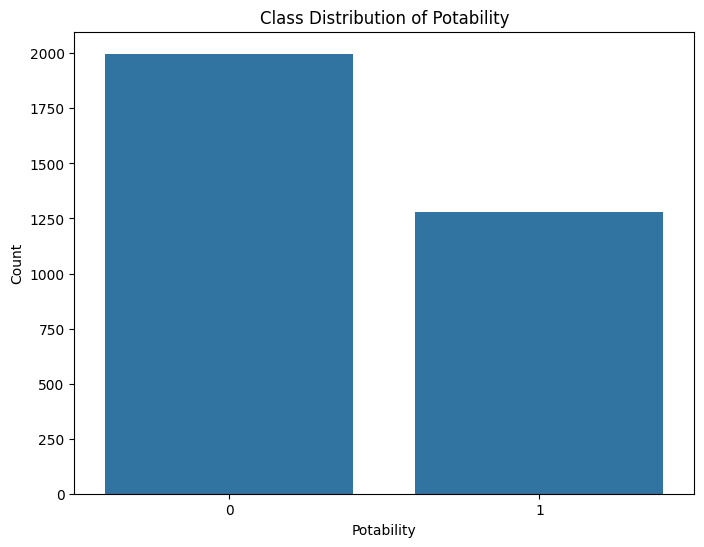

In [63]:
# Visualizing the class balances and structure of our data
y = df['Potability']
plt.figure(figsize=(8, 6))
sns.countplot(x=y)
plt.title('Class Distribution of Potability')
plt.xlabel('Potability')
plt.ylabel('Count')
plt.show()

Potability         1.000000
Solids             0.033743
Chloramines        0.023779
Trihalomethanes    0.006960
Turbidity          0.001581
ph                -0.003287
Conductivity      -0.008128
Hardness          -0.013837
Sulfate           -0.020619
Organic_carbon    -0.030001
Name: Potability, dtype: float64


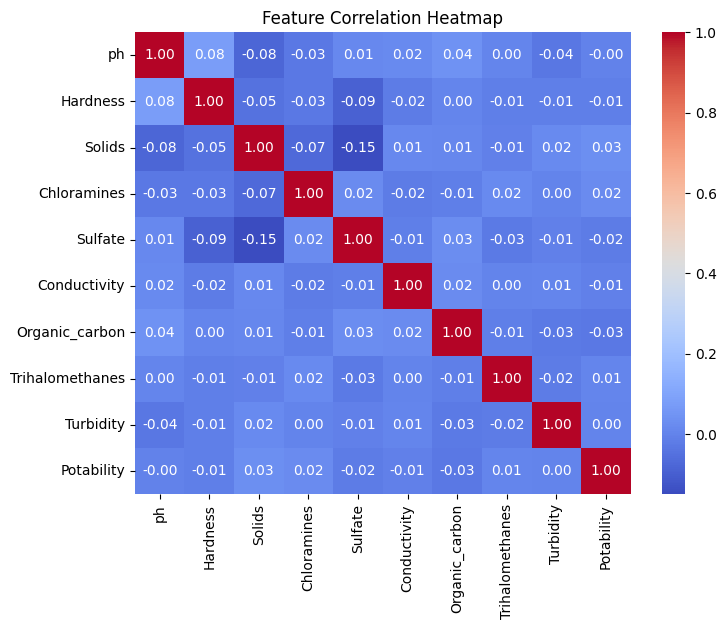

In [49]:
# Display correlation with the target variable to see the best features for the 2D dataset
correlation_matrix = df.corr()

print(correlation_matrix["Potability"].sort_values(ascending=False))

# Visualize correlation
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

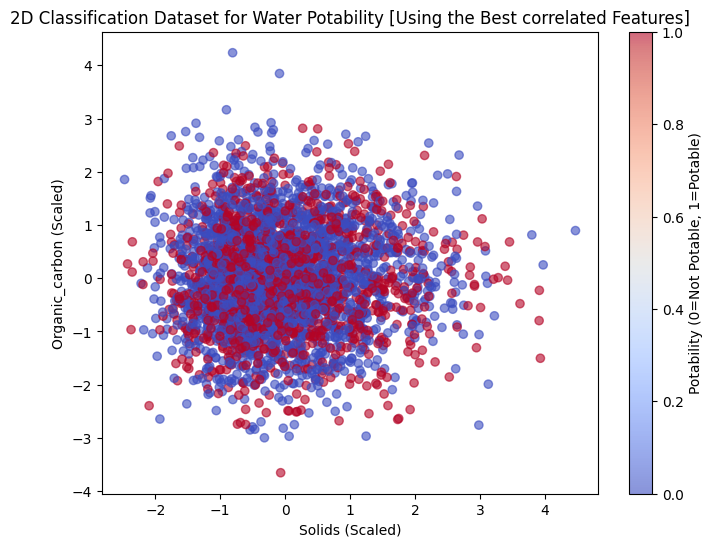

In [56]:

# generate 2d classification dataset using the best features derived from the correlation matrix
X_2D = df[['Solids', 'Organic_carbon']]
y_2D = df['Potability']

# Scaling the 2D data
scaler = StandardScaler()
X_2D_scaled = scaler.fit_transform(X_2D)

# Converting back to DataFrame for clarity
X_2D_scaled_df = pd.DataFrame(X_2D_scaled, columns=['Solids', 'Organic_carbon'])

# Visualizing the features
plt.figure(figsize=(8, 6))
plt.scatter(X_2D_scaled[:, 0], X_2D_scaled[:, 1], c=y_2D, cmap="coolwarm", alpha=0.6)
plt.xlabel("Solids (Scaled)")
plt.ylabel("Organic_carbon (Scaled)")
plt.title("2D Classification Dataset for Water Potability [Using the Best correlated Features]")
plt.colorbar(label="Potability (0=Not Potable, 1=Potable)")
plt.show()

In [53]:
X_2D_scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Solids          3276 non-null   float64
 1   Organic_carbon  3276 non-null   float64
dtypes: float64(2)
memory usage: 51.3 KB


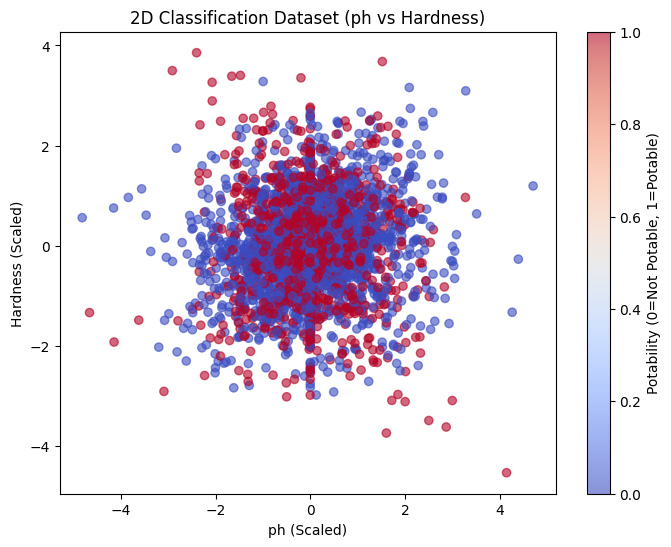

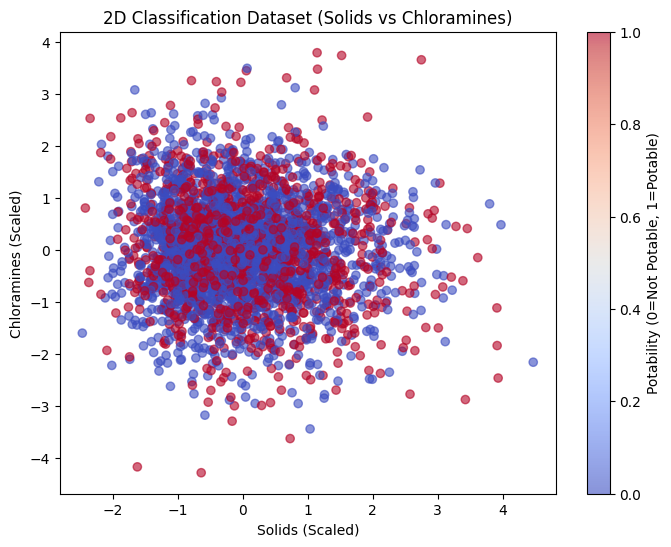

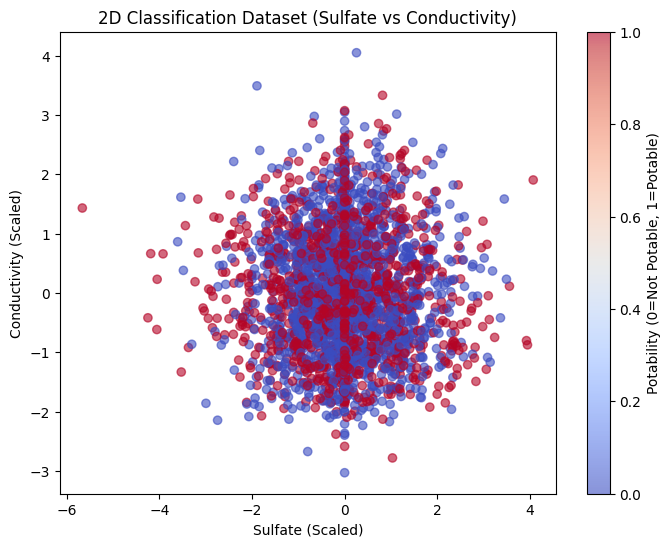

In [55]:
"""
Since the features with the least correlations didn't give clear distinction between the classes,
let us explore more fore other feature pair to see if we can have the best candidates for the 2D class dataset
"""
pairs = [
    ('ph', 'Hardness'),
    ('Solids', 'Chloramines'),
    ('Sulfate', 'Conductivity')
]

for pair in pairs:
    X_2D_test = df[list(pair)]
    y_2D_test = df['Potability']

    # Scaling the selected pair
    X_2D_scaled_test = scaler.fit_transform(X_2D_test)

    # Plotting
    plt.figure(figsize=(8, 6))
    plt.scatter(X_2D_scaled_test[:, 0], X_2D_scaled_test[:, 1], c=y_2D_test, cmap="coolwarm", alpha=0.6)
    plt.xlabel(f"{pair[0]} (Scaled)")
    plt.ylabel(f"{pair[1]} (Scaled)")
    plt.title(f"2D Classification Dataset ({pair[0]} vs {pair[1]})")
    plt.colorbar(label="Potability (0=Not Potable, 1=Potable)")
    plt.show()


# Conclusions From Data Visualizations And 2D daset features iterations

There are no suitable features for a 2D dataset that can be used in the training and evalustion of the neural network and so, it is imperative that we use the whole dataset with all the features we can get so as to increase the chances of our model to distinguish between the two classes.

In [58]:
# Preparing the Whole dataset for use in the model architecture.
X = df.drop('Potability', axis=1)
y = df['Potability']

# Scaling the data
X_scaled = scaler.fit_transform(X)
# Putting it back into a dataframe
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Splitting the data into training and Validation and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X_scaled_df, y, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.15, random_state=42)


# Definition Of the model

In [114]:
#Model Definition by member 1
def model_chrisostome():
    model = Sequential([
        Dense(128, activation='relu', kernel_regularizer=l2(0.01), input_shape=(X_train.shape[1],)),  # Input layer with L2
        Dropout(0.4),
        Dense(64, activation='relu', kernel_regularizer=l2(0.01)),  # Hidden layer with L2
        Dropout(0.3),
        Dense(32, activation='relu', kernel_regularizer=l2(0.01)),  # Hidden layer with L2
        Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer=RMSprop(learning_rate=0.001),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

In [115]:
model = model_chrisostome()
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_66 (Dense)                     │ (None, 128)                 │           1,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_34 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_67 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_35 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_68 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_69 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,649 (45.50 KB)

 Trainable params: 11,649 (45.50 KB)

 Non-trainable params: 0 (0.00 B)